In [1]:
#載入套件
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#資料讀入 
def read_file(file):
    file_path=file
    df = pd.read_csv(file_path)
    #刪除header skiprows=2
    df = pd.read_csv(file_path, header=None,skiprows=2)
    #設定欄位
    df.columns = ['date','volume','volprice','open','high','low','close','spread','num']
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(('date'),inplace=True)
    return df

#讀取三年份的台積電股價csv檔案
frames=[]
for y in range(2015,2019):    
    for i in range(1,13):
        i="{0:0=2d}".format(i)
        y=str(y)        
        path='./'+y+'-'+i+'.csv'
        frames.append(read_file(path))

#縱向合併
df = pd.concat(frames,axis=0,ignore_index=True)

#先取出收盤價欄位
df_close=df['close']

#刪除以下兩個欄位
df = df.drop(['spread'], axis=1)
df = df.drop(['close'], axis=1)

#加入收盤價欄位在最後面
df['close']=df_close

#印出看看
df



,volume,volprice,open,high,low,num,close
0,32214177,4459516134,140.5,140.5,137.5,9377,139.5
1,67649997,9104346055,137.5,137.5,133.0,26240,133.5
2,43886007,5887797145,133.5,135.0,133.5,14735,134.0
3,42551468,5839710584,136.5,138.0,136.0,12327,138.0
4,61920268,8308394250,135.0,135.5,133.0,24470,134.0
5,30402705,4031933265,132.5,133.5,132.0,11823,132.0
6,38093830,5032758490,131.0,133.0,130.5,12537,132.5
7,49447397,6480574787,132.5,133.0,130.0,18536,130.0
8,40996781,5409019683,131.5,133.0,131.5,10987,131.5
9,129035714,17798427458,140.0,140.0,136.0,33344,137.0


In [3]:
#正規化
def normalize(df):
    newdf= df.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    
    newdf['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    newdf['volprice'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    newdf['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    newdf['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    newdf['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    newdf['num'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    newdf['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    
    return newdf

df_norm= normalize(df)

#正規化後印出來看看
df_norm

,volume,volprice,open,high,low,num,close
0,0.190198,0.190198,0.150000,0.132653,0.166667,0.162252,0.162252
1,0.409886,0.409886,0.130000,0.112245,0.136667,0.122517,0.122517
2,0.262559,0.262559,0.103333,0.095238,0.140000,0.125828,0.125828
3,0.254285,0.254285,0.123333,0.115646,0.156667,0.152318,0.152318
4,0.374364,0.374364,0.113333,0.098639,0.136667,0.125828,0.125828
5,0.178967,0.178967,0.096667,0.085034,0.130000,0.112583,0.112583
6,0.226649,0.226649,0.086667,0.081633,0.120000,0.115894,0.115894
7,0.297037,0.297037,0.096667,0.081633,0.116667,0.099338,0.099338
8,0.244647,0.244647,0.090000,0.081633,0.126667,0.109272,0.109272
9,0.790454,0.790454,0.146667,0.129252,0.156667,0.145695,0.145695


In [4]:
#對資料進行訓練集與測試集的切割，另外也定義每一筆資料要有多長的時間框架
def data_helper(df, time_frame):
    
    # 資料特徵數量設定:
    number_features = len(df.columns)

    # 將dataframe 轉成 numpy array
    datavalue = df.values
    print('datavalue.shape:',datavalue.shape)

    result = []
    # 若想要觀察的 time_frame 為20天, 需要多加一天做為驗證答案
    for index in range( len(datavalue) - (time_frame+1) ): # 從 datavalue 的第0個跑到倒數第 time_frame+1 個
        result.append(datavalue[index: index + (time_frame+1) ]) # 逐筆取出 time_frame+1 個K棒數值做為一筆 instance
    
    result = np.array(result)
    print('result.shape:',result.shape)
    
    number_train = round(0.9 * result.shape[0]) # 取 result 的前90% instance做為訓練資料
    print('number_train:',number_train)
    
    x_train = result[:int(number_train),:-1]# 訓練資料中, 只取每一個 time_frame 中除了最後一筆的所有資料做為feature
    y_train = result[:int(number_train),-1][:,-1] # 訓練資料中, 取每一個 time_frame 中最後一筆資料的最後一個數值(收盤價)做為答案
    x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])#XGB不吃三維,所以壓成2維    
    print('x_train.shape:',x_train.shape)
    print('y_train.shape',y_train.shape)
    
    # 測試資料
    x_test = result[int(number_train):,:-1]
    y_test = result[int(number_train):,-1][:,-1]
    x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]) 
    print('x_test.shape:',x_test.shape)
    print('y_test.shape:',y_test.shape)

    return [x_train, y_train, x_test, y_test]



In [11]:
# 以n天為一區間進行股價預測
n=10
X_train, y_train, X_test, y_test = data_helper(df_norm, n)

datavalue.shape: (973, 7)
result.shape: (962, 11, 7)
number_train: 866
x_train.shape: (866, 70)
y_train.shape (866,)
x_test.shape: (96, 70)
y_test.shape: (96,)


In [12]:
#用XGBRegressor做fit
import xgboost  
xgb = xgboost.XGBRegressor(max_depth =10)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
#用fit完的模型做預測
y_pred = xgb.predict(X_test)

In [14]:
#還原數值
def denormalize(df, norm_value):
    original_value = df['close'].values.reshape(-1,1)
    norm_value = norm_value.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit_transform(original_value)
    denorm_value = min_max_scaler.inverse_transform(norm_value)
    
    return denorm_value

In [15]:
# 將預測值與正確答案還原回原來的區間值
denorm_pred = denormalize(df, y_pred)
denorm_ytest =denormalize(df, y_test)

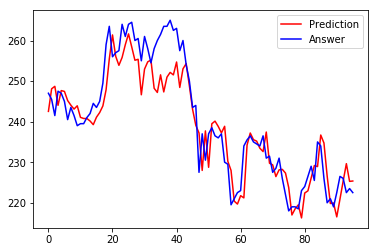

In [16]:
#預測股價結果
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(denorm_pred,color='red', label='Prediction')
plt.plot(denorm_ytest,color='blue', label='Answer')
plt.legend(loc='best')
plt.show()

In [17]:
xgb.score(X_test, y_test)

0.8414828026584493